In [1]:
import pickle
import pandas as pd
import numpy as np
from report.plots import plot_loss_curve, plot_acc_curve, plot_clustering_metrics
from report import basic_report

In [2]:
pd.set_option('display.max_rows', None)
metrics = pd.read_csv("./experiments/dvgg/version_0/metrics.csv")
metrics['epoch'] = metrics['epoch'].fillna(method='ffill')

In [3]:
EPOCHS = 8

def log_metrics_dataframe(epochs):
    train_metrics = []
    valid_metrics = []
    epoch_train_metrics = []
    epoch_valid_metrics = []
    clustering_metrics = []
    
    for n, batch in enumerate(np.split(metrics, epochs)):
        train_metrics.append(batch[["epoch", "step", "train_loss_step", "train_acc_step"]][:125])
        valid_metrics.append(batch[["epoch", "step", "val_loss_step", "val_acc_step"]][125:179])
        epoch_valid_metrics.append(batch[["epoch", "val_loss_epoch", "val_acc_epoch"]][179:180])
        epoch_train_metrics.append(batch[["epoch", "train_loss_epoch", "train_acc_epoch"]][180:181])
        if n > 0:
            clustering_metrics.append(batch[["clu_homogeneity_score", "clu_completeness_score", "clu_v_measure_score", "clu_adjusted_rand_score", "clu_adjusted_mutual_info_score"]][180:181])
        
    train_metrics = pd.concat(train_metrics, axis=0)
    valid_metrics = pd.concat(valid_metrics, axis=0)
    epoch_train_metrics = pd.concat(epoch_train_metrics, axis=0)
    epoch_valid_metrics = pd.concat(epoch_valid_metrics, axis=0)
    clustering_metrics = pd.concat(clustering_metrics, axis=0)
    epoch_metrics = pd.merge(epoch_train_metrics, epoch_valid_metrics, on='epoch')
    epoch_metrics["train_acc_epoch"] = epoch_metrics["train_acc_epoch"] * 100
    epoch_metrics["val_acc_epoch"] = epoch_metrics["val_acc_epoch"] * 100
    return train_metrics, valid_metrics, epoch_metrics, clustering_metrics

train_metrics, valid_metrics, epoch_metrics, clustering_metrics = log_metrics_dataframe(EPOCHS)

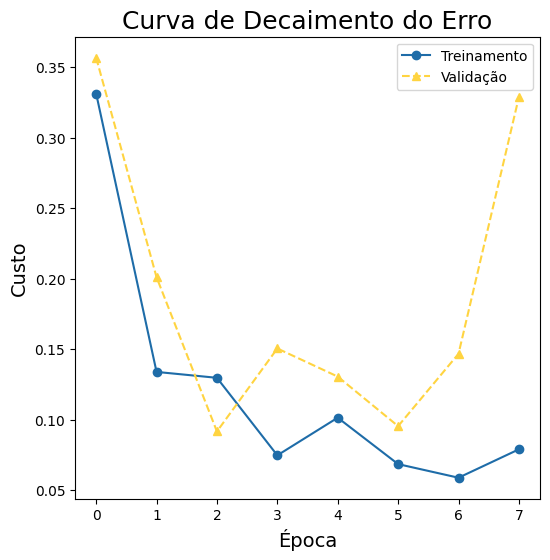

In [4]:
plot_loss_curve(epoch_metrics, show=True, save_as="./experiments/dvgg/version_0/dvgg-loss.png")

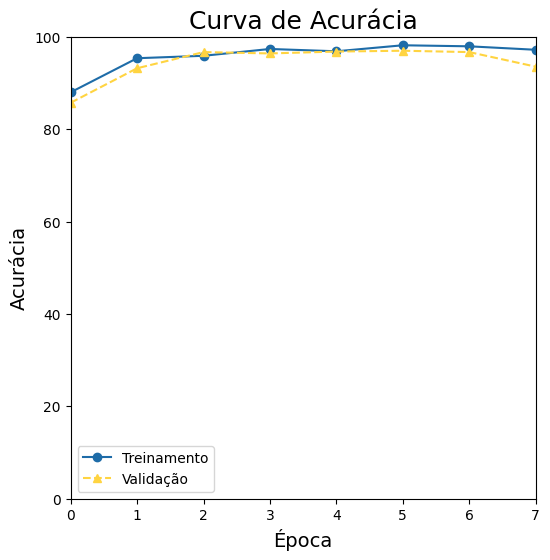

In [5]:
plot_acc_curve(epoch_metrics, show=True, save_as="./experiments/dvgg/version_0/dvgg-acc.png")

In [6]:
clustering_metrics[1:]

,clu_homogeneity_score,clu_completeness_score,clu_v_measure_score,clu_adjusted_rand_score,clu_adjusted_mutual_info_score
542,0.833462,0.827044,0.830241,0.848854,0.830101
723,0.876172,0.875825,0.875999,0.899151,0.875897
904,0.906878,0.904873,0.905874,0.928947,0.905797
1085,0.879564,0.881598,0.880580,0.877872,0.880483
1266,0.851180,0.850178,0.850678,0.860865,0.850557
1447,0.863572,0.862910,0.863241,0.889782,0.863130


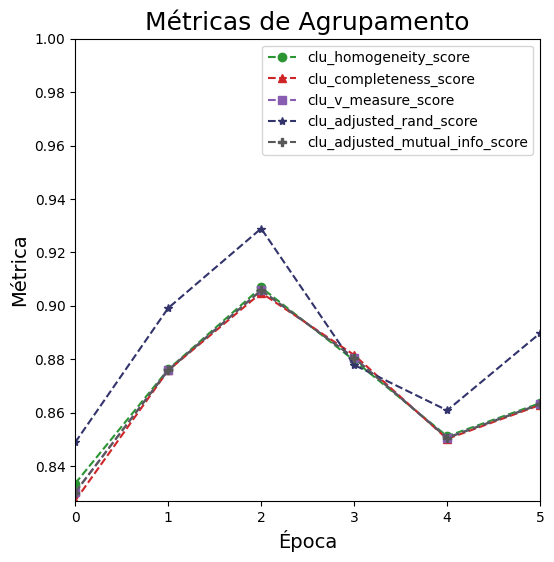

In [7]:
plot_clustering_metrics(clustering_metrics[1:], show=True, save_as="./experiments/dvgg/version_0/dvgg-clustering.png")

In [3]:
with open("./experiments/dvgg/version_0/dvgg-preds.dump", "rb") as f:
    truth_labels, preds_labels = pickle.load(f)

Classification report
              precision    recall  f1-score   support

      glioma      0.945     0.977     0.961       300
  meningioma      0.843     0.984     0.908       306
     notumor      1.000     0.921     0.959       405
   pituitary      0.996     0.900     0.946       300

    accuracy                          0.944      1311
   macro avg      0.946     0.945     0.943      1311
weighted avg      0.950     0.944     0.944      1311



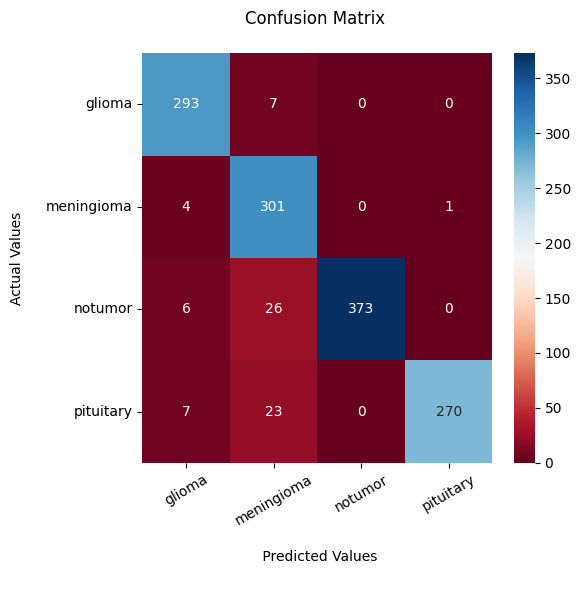

,gli,men,not,pit
glioma,293,7,0,0
meningioma,4,301,0,1
notumor,6,26,373,0
pituitary,7,23,0,270


In [4]:
basic_report(truth_labels, preds_labels, labels=[0,1,2,3], label_names=["glioma", "meningioma", "notumor", "pituitary"], show=True, 
             save_as="./experiments/dvgg/version_0/dvgg-confusion-matrix.png")